In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


dataset_path = r'C:\Users\nithin\Desktop\diabetes.csv'
data = pd.read_csv(dataset_path)


X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


y = [1 if label == 1 else -1 for label in y]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


class Perceptron:
    def __init__(self, learning_rate=0.01, num_epochs=100):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.num_epochs):
            for i in range(num_samples):
                linear_output = np.dot(X[i], self.weights) + self.bias
                prediction = self.predict(linear_output)
                update = self.learning_rate * (y[i] - prediction)

                self.weights += update * X[i]
                self.bias += update

    def predict(self, X):
        return np.where(X >= 0, 1, -1)


perceptron = Perceptron(learning_rate=0.1, num_epochs=100)
perceptron.fit(X_train, y_train)


y_pred = perceptron.predict(np.dot(X_test, perceptron.weights) + perceptron.bias)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)



Accuracy: 71.43%
Confusion Matrix:
[[88 11]
 [33 22]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.73      0.89      0.80        99
           1       0.67      0.40      0.50        55

    accuracy                           0.71       154
   macro avg       0.70      0.64      0.65       154
weighted avg       0.71      0.71      0.69       154



Accuracy: 71.43%
Confusion Matrix:
[[88 11]
 [33 22]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.73      0.89      0.80        99
           1       0.67      0.40      0.50        55

    accuracy                           0.71       154
   macro avg       0.70      0.64      0.65       154
weighted avg       0.71      0.71      0.69       154



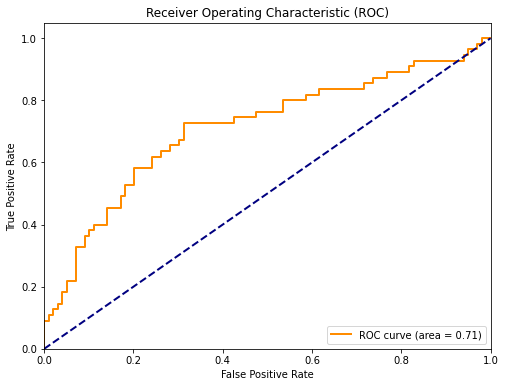

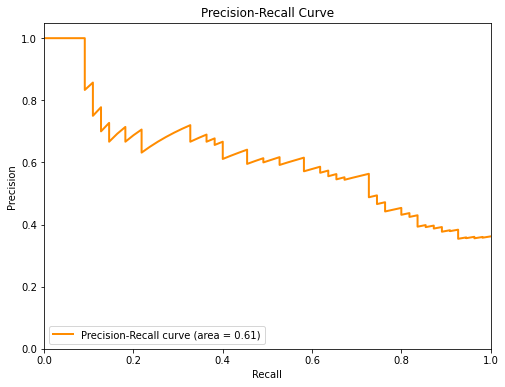

In [4]:
## with the grapgs for more information:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc


dataset_path = r'C:\Users\nithin\Desktop\diabetes.csv'
data = pd.read_csv(dataset_path)


X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


y = [1 if label == 1 else -1 for label in y]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


class Perceptron:
    def __init__(self, learning_rate=0.01, num_epochs=100):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.num_epochs):
            for i in range(num_samples):
                linear_output = np.dot(X[i], self.weights) + self.bias
                prediction = self.predict(linear_output)
                update = self.learning_rate * (y[i] - prediction)

                self.weights += update * X[i]
                self.bias += update

    def predict(self, X):
        return np.where(X >= 0, 1, -1)


perceptron = Perceptron(learning_rate=0.1, num_epochs=100)
perceptron.fit(X_train, y_train)


y_pred = perceptron.predict(np.dot(X_test, perceptron.weights) + perceptron.bias)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


decision_values = np.dot(X_test, perceptron.weights) + perceptron.bias


fpr, tpr, _ = roc_curve(y_test, decision_values)
roc_auc = auc(fpr, tpr)


precision, recall, _ = precision_recall_curve(y_test, decision_values)
pr_auc = auc(recall, precision)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()
